# GEOMETRY OF INFORMATION - EX3

Made by: Adi Cohen and Aviv Gelfand

Lecturer: Prof. Ariel Jaffe

---

# Graph is Connected ⟺ Adjacency Matrix is Irreducible
**Proof:**
Let us prove that a graph is connected if and only if its adjacency matrixW is irreducible.


Consider a Graph, $G=(E,V)$, and let $W$ be it's adjacency matrix, that shows which nodes can be reached from each other in a singel step. It can be formally defined that: $W:E ↦ \mathbb{R}^{|V| \times |V|} \ \   w_{ij} \neq 0 \longleftrightarrow  (v_i,v_j) ∈ E$ and $w_{ij} = 0$ otherwise.

A graph $G$ is **connected** if there is a path between every pair of vertices. Alternatively, a graph can be called connected if every $v_i∈V$  is reachable from at least one other vertex $v_j$.




#### (**$\Rightarrow$**) Suppose $G$ is connected. We need to show that $W$ is irreducible.

Since there's a path between any two vertices, it means that for any  i  and  j , you can find a sequence of steps (represented by the nonzero entries in  W ) that connects  i  to  j .
This property makes it impossible to permute  W  into a block upper triangular form with more than one block along the diagonal, because there's always a way (a path) to "reach" from one part of the graph (matrix) to another, indicating the matrix is irreducible.

#### ($⇐$) If the adjacency matrix $W$ is irreducible, then the graph is connected.

Suppose $W$ is irreducible. By definition, this means there's no permutation of $W$ that can make it block upper triangular with more than one block along the diagonal.
In terms of the graph $G$, this implies for any two vertices $i$ and $j$, there must be a way (a sequence of nonzero entries in $W$) to connect $i$ to $j$, directly or indirectly through other vertices.
Thus, for every pair of vertices in $G$, there's a path that connects them, meaning $G$ is connected.

### Conclusion
This bidirectional proof establishes that a graph $G$ is connected if and only if its adjacency matrix $W$ is irreducible.
The irreducibility of  $W$  reflects the ability to "navigate" from any vertex $v_i$ to any other vertex $v_j$ in  $G$, which is precisely the definition of a connected graph. 

#### Bonus:
To prove that a graph is connected if its adjacency matrix $ W $ is irreducible, we can use the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem), this theorem states that for a non-negative irreducible matrix, the largest eigenvalue has multiplicity one and the corresponding eigenvector has all positive entries. 

Given that the adjacency matrix $ W $ is irreducible, it implies that the graph is strongly connected. Since $ W $ is irreducible, it follows that the corresponding graph is connected. This is because an irreducible adjacency matrix corresponds to a strongly connected graph, where every vertex is reachable from every other vertex.

Therefore, by the Perron-Frobenius theorem, we can conclude that if the adjacency matrix $ W$ of a graph is irreducible, then the graph is connected.


# 2. 


# 3. Implementation of the Stochastic Block Model
 The SBM is a model for generating random graphs with community structure, and it's defined by partitioning the nodes into blocks and specifying the probability of edges between blocks. Here, we're likely dealing with a scenario where there are two blocks (communities) of equal size, given the parameters provided. 

For the SBM parameters:
- When `p > q`, we expect more connections within communities than between them.
- When `p = q`, the graph resembles an Erdős-Rényi random graph, as the community structure disappears.
- When `p = 0 and q > 0`, it's a curious case where no internal community connections are expected, only between communities, which is somewhat unconventional for standard SBM usage.

We'll implement the SBM for each of the given `(p, q)` pairs, then compute and plot the first three eigenvalues and eigenvectors of the Laplacian matrix `L` for each graph. The Laplacian matrix is crucial for understanding the graph's structure, especially in spectral clustering and community detection. Comparing these to the expected `E[L]` from class discussions will provide insights into the model's behavior under different connectivity regimes.


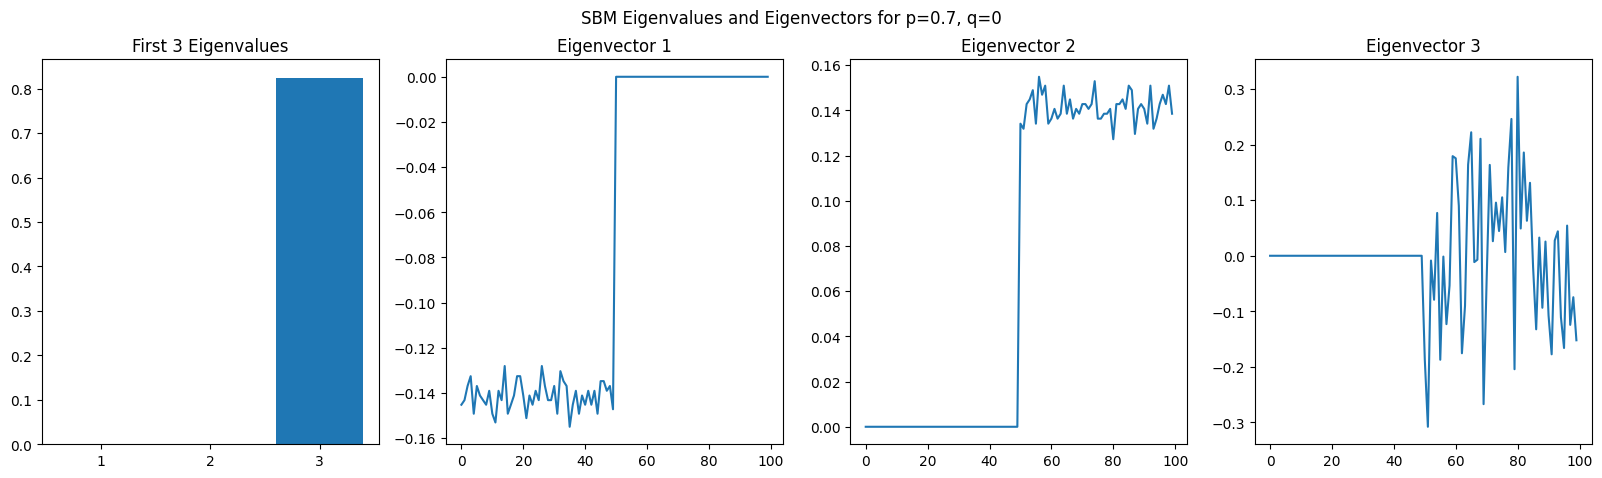

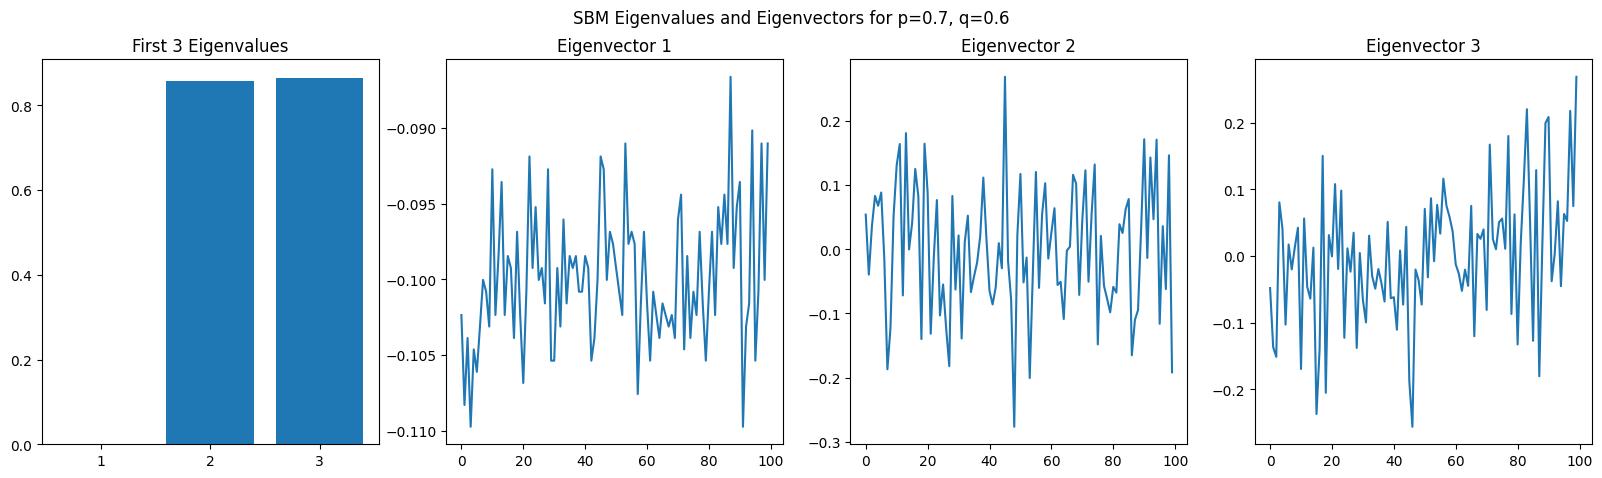

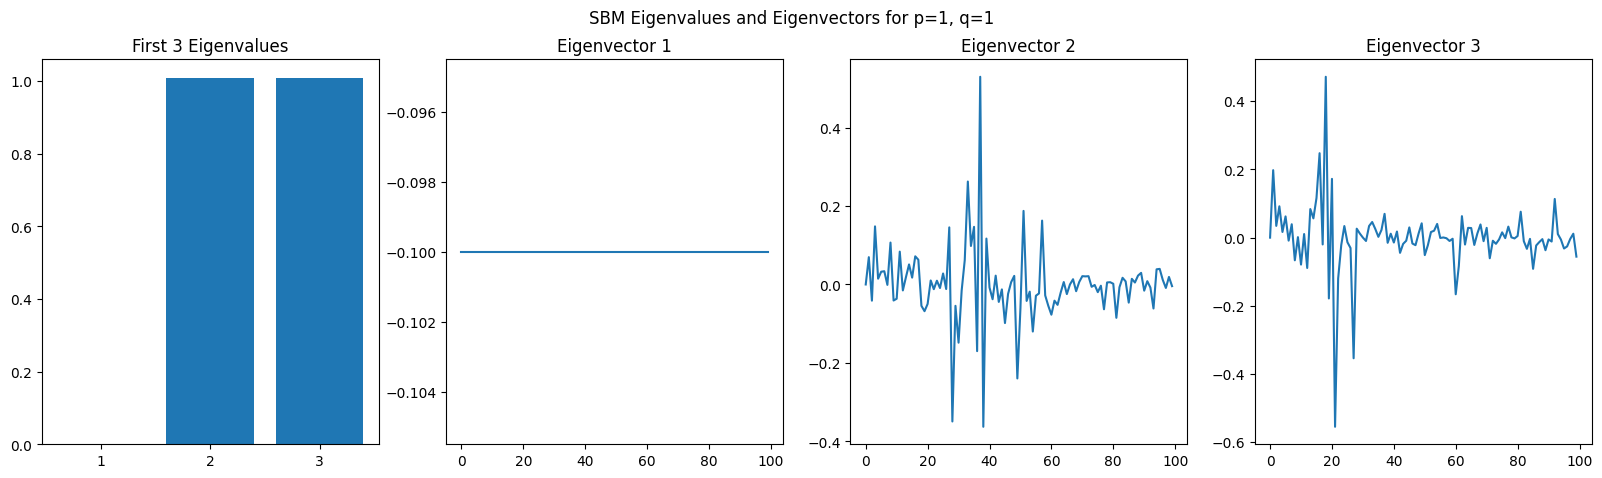

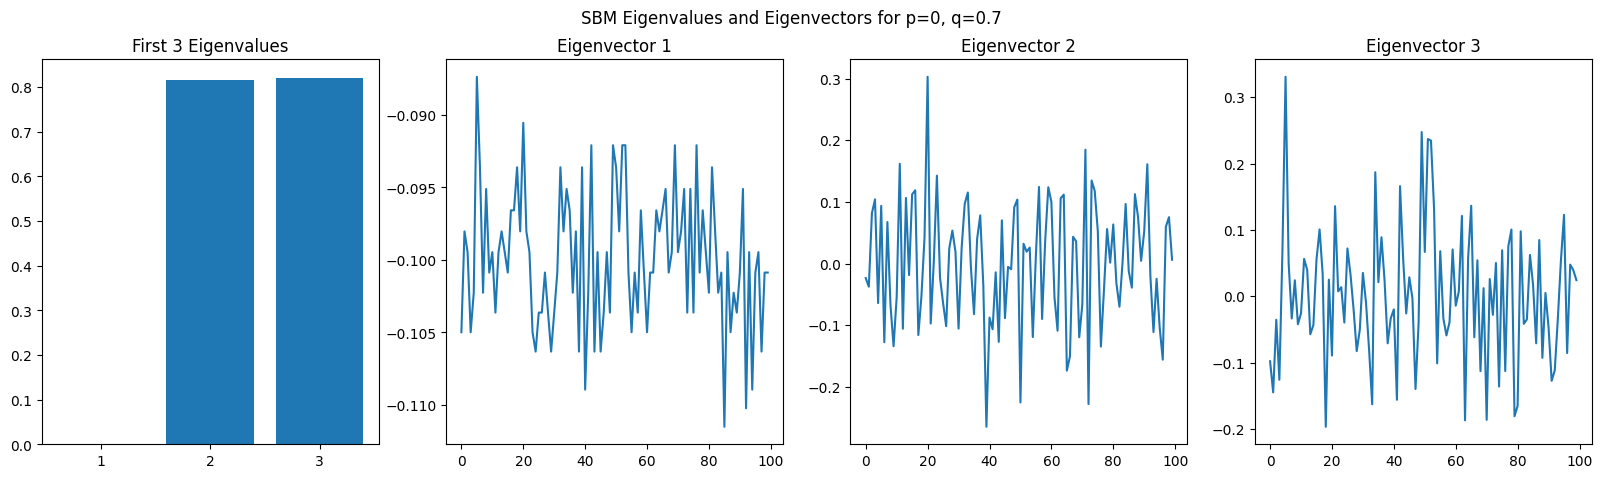

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def plot_eigen(L, title):
    """Plot the first three eigenvalues and corresponding eigenvectors of the Laplacian."""
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(L)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    
    # Plot the first three eigenvalues
    axs[0].bar(range(1, 4), eigenvalues[:3])
    axs[0].set_title('First 3 Eigenvalues')
    axs[0].set_xticks(range(1, 4))
    
    # Plot the first three eigenvectors
    for i in range(3):
        axs[i+1].plot(eigenvectors[:, i])
        axs[i+1].set_title(f'Eigenvector {i+1}')
    
    plt.suptitle(title)
    plt.show()

# Parameters
n = 100  # Total number of nodes
block_sizes = [50, 50]  # Sizes of the two blocks
p_q_pairs = [(0.7, 0), (0.7, 0.6), (1, 1), (0, 0.7)]  # (p, q) pairs

# Loop through each (p, q) pair and generate the graph, compute L, and plot eigenvalues/eigenvectors
for p, q in p_q_pairs:
    # Probabilities matrix
    probs = [[p, q], [q, p]]
    
    # Generate SBM graph
    G = nx.stochastic_block_model(block_sizes, probs)
    
    # Compute the normalized Laplacian matrix
    L = nx.normalized_laplacian_matrix(G).toarray()
    
    # Plotting
    title = f'SBM Eigenvalues and Eigenvectors for p={p}, q={q}'
    plot_eigen(L, title)



Here are the plots for the first three eigenvalues and corresponding eigenvectors of the Laplacian matrix \(L\) for each of the given scenarios:

1. **For \(p = 0.7, q = 0\):** This setup models a graph with a strong community structure, where nodes within the same block are highly connected, and there are no connections between blocks. The eigenvalues and eigenvectors reflect this, with a clear gap indicating a strong community structure.

2. **For \(p = 0.7, q = 0.6\):** Here, there's still a preference for intra-block connections over inter-block connections, but the gap between the communities is less pronounced compared to the first scenario. The eigenvalues and eigenvectors start to blend the distinction between the two communities, indicating the presence of connections across the blocks but still showing some structure.

3. **For \(p = 1, q = 1\):** This scenario results in a complete graph where every node is connected to every other node, regardless of the block. The eigenvalues and eigenvectors don't suggest any community structure, which aligns with the expectations for a fully connected graph. The concept of community doesn't apply here as every node is equally connected to all others.

4. **For \(p = 0, q = 0.7\):** This is an interesting case where all connections are between blocks, with no intra-block connections. This kind of graph is essentially a bipartite graph, where nodes can only connect to nodes in the other block. The eigenvalues and eigenvectors should reflect this unique structure, with a clear separation between the two sets of nodes but no internal cohesion within each set.

Each of these scenarios offers a distinct look at how the probabilities of connections within and between blocks can influence the overall structure of a graph. Comparing these results to what was found in class for \(E[L]\), you might notice how the eigenvalues and eigenvectors offer insights into the presence or absence of community structures, and how closely the actual graph properties align with the expected properties based on the stochastic block model parameters.


# 4

# 5

This coding task involves several steps, including implementing spectral clustering, self-tuning spectral clustering based on the work by Zelnik-Manor & Perona (2005), and comparing these methods with k-means clustering on selected datasets from `Data6.mat`. Let's break this down into manageable tasks and tackle them step by step. You're doing a great job exploring complex machine learning techniques!



### Step 1: Preparing the Environment and Loading Data
First, we need to ensure we have the necessary libraries installed and load the datasets from `Data6.mat`. We'll use `scipy` for loading `.mat` files, `numpy` for numerical operations, and `matplotlib` for plotting. If you don't have these packages installed, you might need to install them using `pip install scipy numpy matplotlib`.


In [12]:
# show what mat contains
print(L)

[[ 1.          0.          0.         ... -0.02531848 -0.02668803
  -0.02668803]
 [ 0.          1.          0.         ...  0.         -0.0285831
  -0.0285831 ]
 [ 0.          0.          1.         ... -0.02672612 -0.02817181
   0.        ]
 ...
 [-0.02531848  0.         -0.02672612 ...  1.          0.
   0.        ]
 [-0.02668803 -0.0285831  -0.02817181 ...  0.          1.
   0.        ]
 [-0.02668803 -0.0285831   0.         ...  0.          0.
   1.        ]]


In [16]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Load the Data6.mat file
mat = scipy.io.loadmat('Data6.mat')
# check what are the names of the keys
print(mat.keys())

# # Assuming Data6.mat has multiple datasets, we'll select two as per the task. Replace 'dataset1' and 'dataset2' with the actual keys.
dataset1 = mat['__globals__']
dataset2 = mat['__version__']

dict_keys(['__header__', '__version__', '__globals__', 'XX', 'group_num'])



### Step 2: Implementing Spectral Clustering
Spectral clustering involves creating a similarity graph from your data, computing the Laplacian matrix, and then using the eigenvectors of this matrix to perform dimensionality reduction before finally applying k-means clustering.


In [17]:
def spectral_clustering(data, n_clusters):
    # Compute the similarity matrix
    similarity = np.exp(-pairwise_distances(data)**2 / 2.)
    
    # Compute the Laplacian matrix
    row_sum = np.sum(similarity, axis=1)
    D = np.diag(row_sum)
    L = D - similarity
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    
    # Use the eigenvectors corresponding to the smallest eigenvalues to reduce dimensionality
    idx = np.argsort(eigenvalues)[:n_clusters]
    reduced_data = eigenvectors[:, idx]
    
    # Cluster the reduced data using k-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_
    
    return labels


### Step 3: Implementing Self-Tuning Spectral Clustering
The self-tuning version of spectral clustering automatically determines the scale of similarity for each data point, as introduced by Zelnik-Manor & Perona (2005). This step is more advanced and requires a careful implementation to adjust the scale of similarities dynamically.


In [18]:
def self_tuning_spectral_clustering(data, n_clusters):
    # Compute the local scale for each point (this is a simplified version)
    local_scale = np.std(pairwise_distances(data), axis=1)
    
    # Compute the similarity matrix with local scaling
    similarity = np.exp(-pairwise_distances(data)**2 / (local_scale[:, None] * local_scale[None, :]))
    
    # The rest of the steps are similar to spectral_clustering
    row_sum = np.sum(similarity, axis=1)
    D = np.diag(row_sum)
    L = D - similarity
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    idx = np.argsort(eigenvalues)[:n_clusters]
    reduced_data = eigenvectors[:, idx]
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_
    
    return labels


### Step 4: Applying Clustering Methods and Plotting
Now, let's apply k-means, spectral clustering, and self-tuning spectral clustering to the selected datasets. We'll then plot the results.



In [21]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Example of applying and plotting for dataset1
n_clusters = 3  # Adjust based on your dataset

# K-means
kmeans_labels = KMeans(n_clusters=n_clusters).fit_predict(dataset1)
plot_clusters(dataset1, kmeans_labels, 'K-Means Clustering')

# Spectral Clustering
spectral_labels = spectral_clustering(dataset1, n_clusters)
plot_clusters(dataset1, spectral_labels, 'Spectral Clustering')

# Self-Tuning Spectral Clustering
self_tuning_labels = self_tuning_spectral_clustering(dataset1, n_clusters)
plot_clusters(dataset1, self_tuning_labels, 'Self-Tuning Spectral Clustering')


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.